# Project - Predict the wellbeing of shanghainese communities

In [48]:
import pandas as pd
from matplotlib import pyplot
from shapely.geometry import Point, Polygon
from pandas.plotting import scatter_matrix

In [3]:
df_target = pd.read_pickle("./dataset/TARGET-communities-extract-wellbeing.pkl")
header = df_target[0]
df_target = pd.DataFrame(data=df_target, columns=header)
df_target = df_target.drop(df_target.index[0])
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude
1,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287016932,31.1558823799679
2,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529089795,31.144326843509
3,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520387505,31.0422853979528
4,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237458941,31.2407251034807
5,万里名轩社区居委会,2,,0.0,万里街道,普陀区,121.403601417271,31.269155049366


cleanliness (1-4, 4 best), smell (0-1,1 worst),  noise (0-1, 1 worst)

In [4]:
df_target.shape

(467, 8)

In [28]:
df_target.dtypes

               object
clean           int64
smell           int64
noise           int64
town           object
district       object
longitude     float64
latitude      float64
clean_coef    float64
noise_coef    float64
smell_coef    float64
happiness     float64
dtype: object

In [6]:
df_target['clean'] = pd.to_numeric(df_target['clean'])
df_target['smell'] = pd.to_numeric(df_target['smell'])
df_target['noise'] = pd.to_numeric(df_target['noise'])

In [27]:
df_target['longitude'] = pd.to_numeric(df_target['longitude'])
df_target['latitude'] = pd.to_numeric(df_target['latitude'])

In [9]:
df_target['smell'] = df_target['smell'].apply(lambda x: 1 if x==0  else 0)
df_target['noise'] = df_target['noise'].apply(lambda x: 1 if x==0  else 0)
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude
1,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679
2,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509
3,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528
4,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807
5,万里名轩社区居委会,2,0,1,万里街道,普陀区,121.403601417271,31.269155049366


cleanliness (1-4, 4 best), smell (0-1,0 worst),  noise (0-1, 0 worst)

In [11]:
df_target.describe()

,clean,smell,noise
count,467.000000,467.000000,467.000000
mean,2.556745,0.815846,0.781585
std,0.633890,0.388026,0.413614
min,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,3.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000


## Target happiness

In [19]:
df_target['clean_coef'] = (df_target['clean']-1)/3*0.325
df_target['noise_coef'] = (df_target['noise']*0.325)
df_target['smell_coef'] = (df_target['smell']*0.35)
df_target['happiness'] = (df_target['smell_coef'] + df_target['noise_coef'] + df_target['clean_coef']) * 10
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude,clean_coef,noise_coef,smell_coef,happiness
1,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287016932,31.1558823799679,0.216667,0.325,0.35,8.916667
2,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529089795,31.144326843509,0.216667,0.325,0.00,5.416667
3,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520387505,31.0422853979528,0.108333,0.325,0.35,7.833333
4,万豪居委会,3,1,1,长征镇,普陀区,121.367237458941,31.2407251034807,0.216667,0.325,0.35,8.916667
5,万里名轩社区居委会,2,0,1,万里街道,普陀区,121.403601417271,31.269155049366,0.108333,0.325,0.00,4.333333


In [26]:
df_target.dtypes

               object
clean           int64
smell           int64
noise           int64
town           object
district       object
longitude      object
latitude       object
clean_coef    float64
noise_coef    float64
smell_coef    float64
happiness     float64
dtype: object

In [29]:
geometry = [Point(xy) for xy in zip(df_target['longitude'], df_target['latitude'])]

In [30]:
df_target['geometry'] = geometry

In [31]:
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude,clean_coef,noise_coef,smell_coef,happiness,geometry
1,万寿社区居委会,3,1,1,盈浦街道,青浦区,121.104287,31.155882,0.216667,0.325,0.35,8.916667,POINT (121.104287016932 31.1558823799679)
2,万泰花园第一居委会,3,0,1,七宝镇,闵行区,121.351529,31.144327,0.216667,0.325,0.00,5.416667,POINT (121.351529089795 31.144326843509)
3,万科阳光苑居委会,2,1,1,吴泾镇,闵行区,121.468520,31.042285,0.108333,0.325,0.35,7.833333,POINT (121.468520387505 31.0422853979528)
4,万豪居委会,3,1,1,长征镇,普陀区,121.367237,31.240725,0.216667,0.325,0.35,8.916667,POINT (121.367237458941 31.2407251034807)
5,万里名轩社区居委会,2,0,1,万里街道,普陀区,121.403601,31.269155,0.108333,0.325,0.00,4.333333,POINT (121.403601417271 31.269155049366)


In [32]:
df_target.to_pickle("./df_target.pickle")

# Input data - POI

In [18]:
df_poi = pd.read_pickle("./variables/poi_per_district.pkl")
df_poi.head()

,geometry,nb_transportation,nb_shopping,nb_restaurant,nb_scenicSpot,nb_stadiumAndGym
0,"POLYGON Z ((121.42168 30.68471 0.00000, 121.42...",0,0,0,0,0
1,"POLYGON Z ((121.41199 30.69374 0.00000, 121.41...",0,0,0,0,0
2,"POLYGON Z ((121.40163 30.70717 0.00000, 121.40...",0,0,0,0,0
3,"POLYGON Z ((121.33687 30.73806 0.00000, 121.33...",1087,1789,748,28,32
4,"POLYGON Z ((121.25143 30.79177 0.00000, 121.25...",1428,1762,616,9,12


## Check is the point is in the discrict

In [37]:
happiness = {}
total = 0
sum_happiness = 0
for index, polygon in df_poi['geometry'].items():
    for happy, point in zip(df_target['happiness'], df_target['geometry']):
        if point.within(polygon) == True:
            sum_happiness += happy
            total += 1
    if total != 0 : 
        happiness[index] = sum_happiness/total
    else:
        happiness[index] = 0
    sum_mean = 0
    total = 0

In [55]:
df_predict = df_poi.copy()

In [58]:
df_predict['happiness'] = happiness.values()
df_predict.head()

,geometry,nb_transportation,nb_shopping,nb_restaurant,nb_scenicSpot,nb_stadiumAndGym,happiness
0,"POLYGON Z ((121.42168 30.68471 0.00000, 121.42...",0,0,0,0,0,0.0
1,"POLYGON Z ((121.41199 30.69374 0.00000, 121.41...",0,0,0,0,0,0.0
2,"POLYGON Z ((121.40163 30.70717 0.00000, 121.40...",0,0,0,0,0,0.0
3,"POLYGON Z ((121.33687 30.73806 0.00000, 121.33...",1087,1789,748,28,32,0.0
4,"POLYGON Z ((121.25143 30.79177 0.00000, 121.25...",1428,1762,616,9,12,0.0


# Data viz - See the distribution 

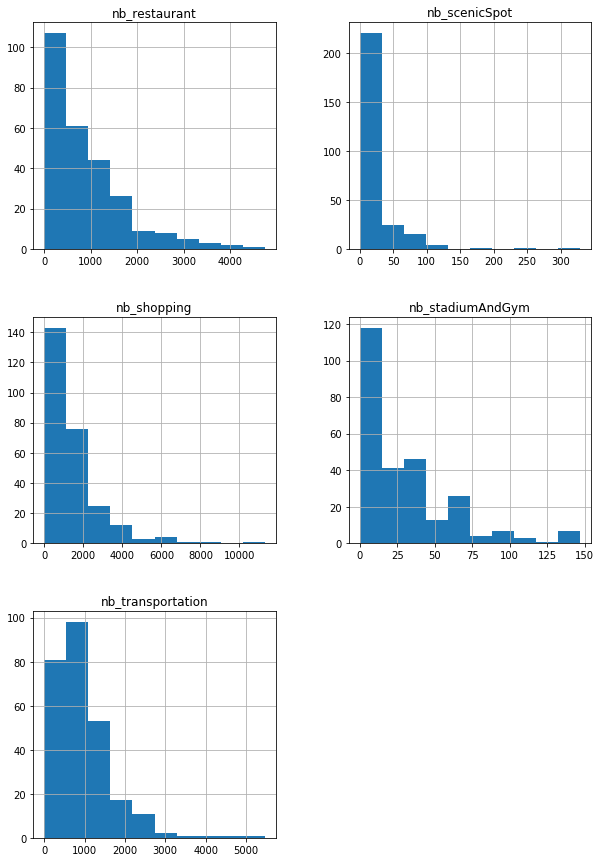

In [65]:
df_poi.hist(figsize=(10,15))
pyplot.show()

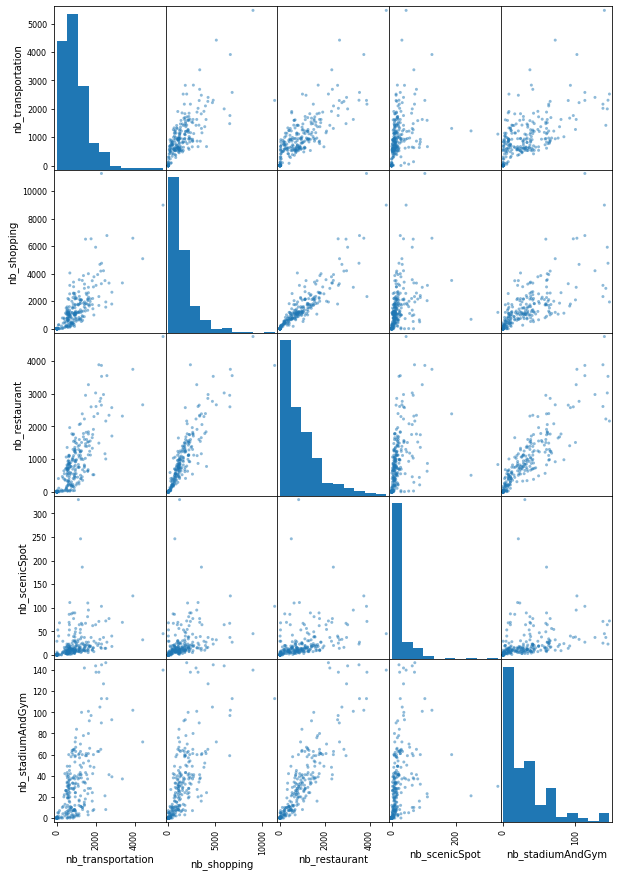

In [66]:
# scatter plot matrix
scatter_matrix(df_poi, figsize=(10,15))
pyplot.show()